## اضاف کردن کتابخانه‌های مورد نیاز

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



اگر کار با دیتافریم و پانداس را بلد نیستید اصلا نگران نباشید. در کارگاه پایتون به تفصیل در این باره صحبت خواهیم کرد. در این بخش تنها هدف مشاهده داده‌های آماری و سپس حل مسئله با آن است و نیازی به دانش استفاده از کتابخانه‌ها نداریم. تنها کد مربوط به هر سلول را اجرا کنید تا نتایج و داده ها را مشاهده کنید و از نظر آماری آن‌ها را بررسی کنید. به زودی در کارگاه پایتون در مورد جزئیات این کار صحبت خواهیم کرد. 

## فراخوانی و آماده‌سازی اولیه
ابتدا داده‌ی مورد نظر را در پایتون فراخوانی می‌کنیم و تنها مسافرانی را در نظر می‌گیریم که مقدار سن آن‌ها در داده موجود است.
پس از خواندن داده برای بدست آورن مقادیر ستون‌های خواسته شده، ردیف‌هایی که خالی هستند و 
داده‌ای در آنها وجود ندارد را حذف می‌کنیم



In [2]:
df = pd.read_csv('titanic.csv')
ages = df.Age[ ~df.Age.isna() ].values
survived = df['Survived'][ ~df.Age.isna() ].values
sex = df['Sex'][ ~df.Age.isna() ].values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## یک مشاهده‌ی کوچک! :جنسیت بازمانده‌ها
به جواب خلاصه‌سازی زیر توجه کنید:

In [3]:
df.groupby(['Sex','Survived']).agg({'PassengerId':'count'})

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

همانگونه که مشاهده می‌کنید، «بانوان» ۷۴.۲٪ شانس زنده ماندن دارند و «آقایان» ۱۸.۹٪ شانس زنده ماندن دارند!

> آیا این نشان دهنده‌ی این است که بانوان از چالاکی بالاتری (از نظر آماری) برخوردارند؟

خیر. این نشان دهنده‌ی قوانین و سیاست نجات‌دهی در شرایط بحرانی است که ابتدا بانوان و کودکان را سوار کشتی‌های نجات می‌کردند.


# هیستوگرام
یک راه بررسی بصری رفتار موجود در داده، رسم هیستوگرام است.

در ادامه هیستوگرام‌های زیر را رسم می‌کنیم:
- مقایسه‌ی توزیع سنی مسافران
- دسته‌بندی دلخواه توزیع
- دسته‌بندی دلخواه به تفکیک جنسیت

### توزیع سنی مسافران
 هیستوگرام سن مسافران را به تفکیک «نجات‌یافته/مرده» (سبز/قرمز) در زیر مشاهده می‌کنید:


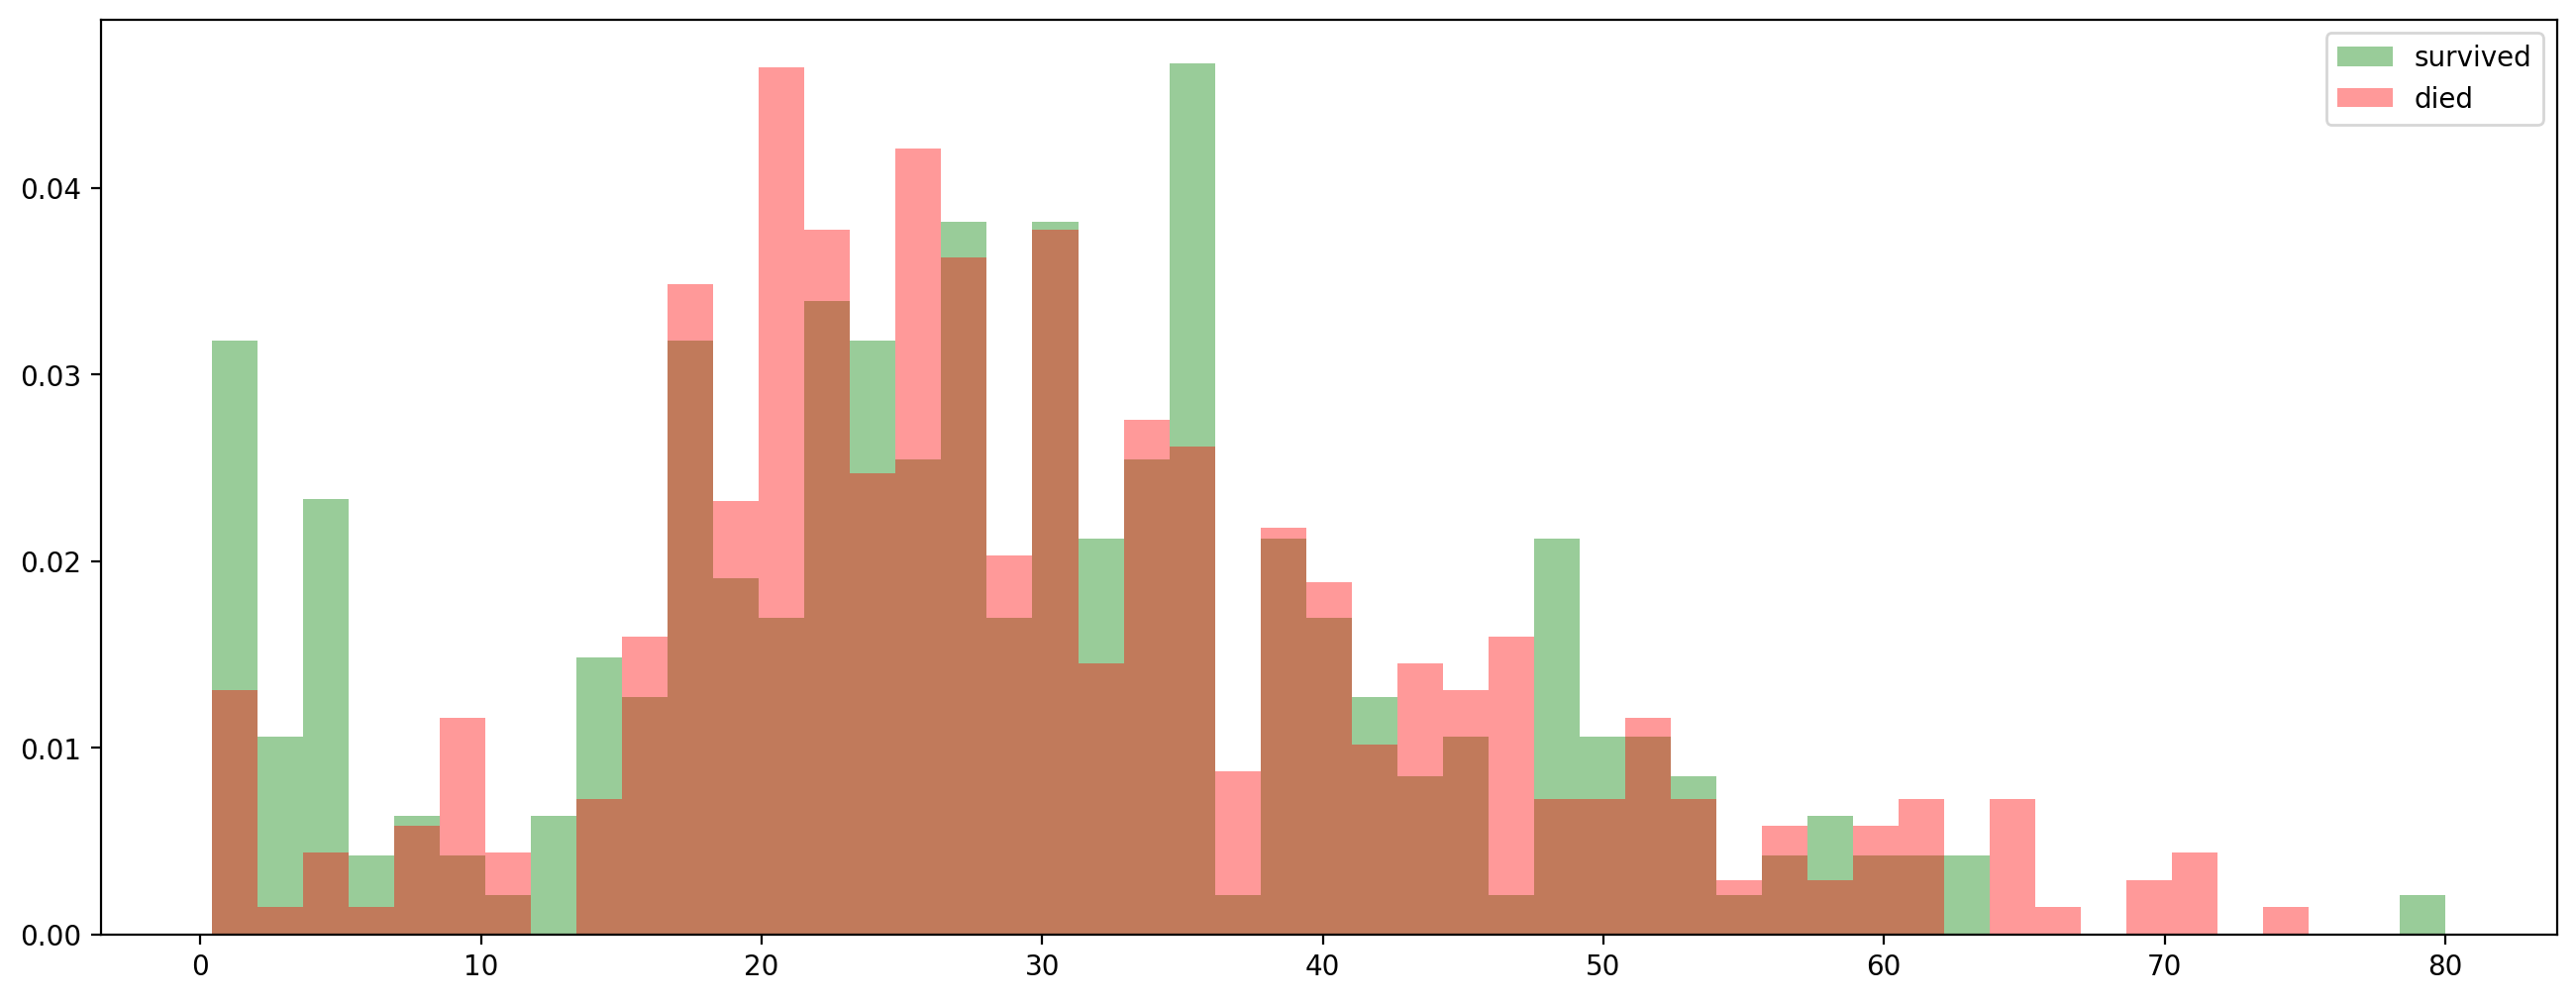

In [4]:
v_min, v_max = min( ages ), max(ages)
bins = np.linspace( v_min, v_max, 50 )

plt.figure( figsize=(16,6), dpi = 200 )

# Survived
indices = survived == 1
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived' )
# Died
indices = survived == 0
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died' )

plt.legend()
plt.show()

### دسته‌بندی سنی دلخواه
همانگونه که مشاهده می‌کنید، هیستوگرام، بازه‌ها (`bins`) را یک اندازه می‌گیرد (که البته در بخش قبل، ما خودمان آن‌ها را یک اندازه گرفته بودیم!). اما گاه نیاز است که دسته‌بندی دلخواهی به هیستوگرام بدهیم. به طور مثال تمامی افراد بین ۰ تا ۱۰ سال را در کنار هم بشمریم، افراد ۱۰ تا ۲۰ سال را نیز به همین شکل، و ۲۰ تا ۴۵، ۴۵ تا ۶۰ و ۶۰ تا ۸۰.


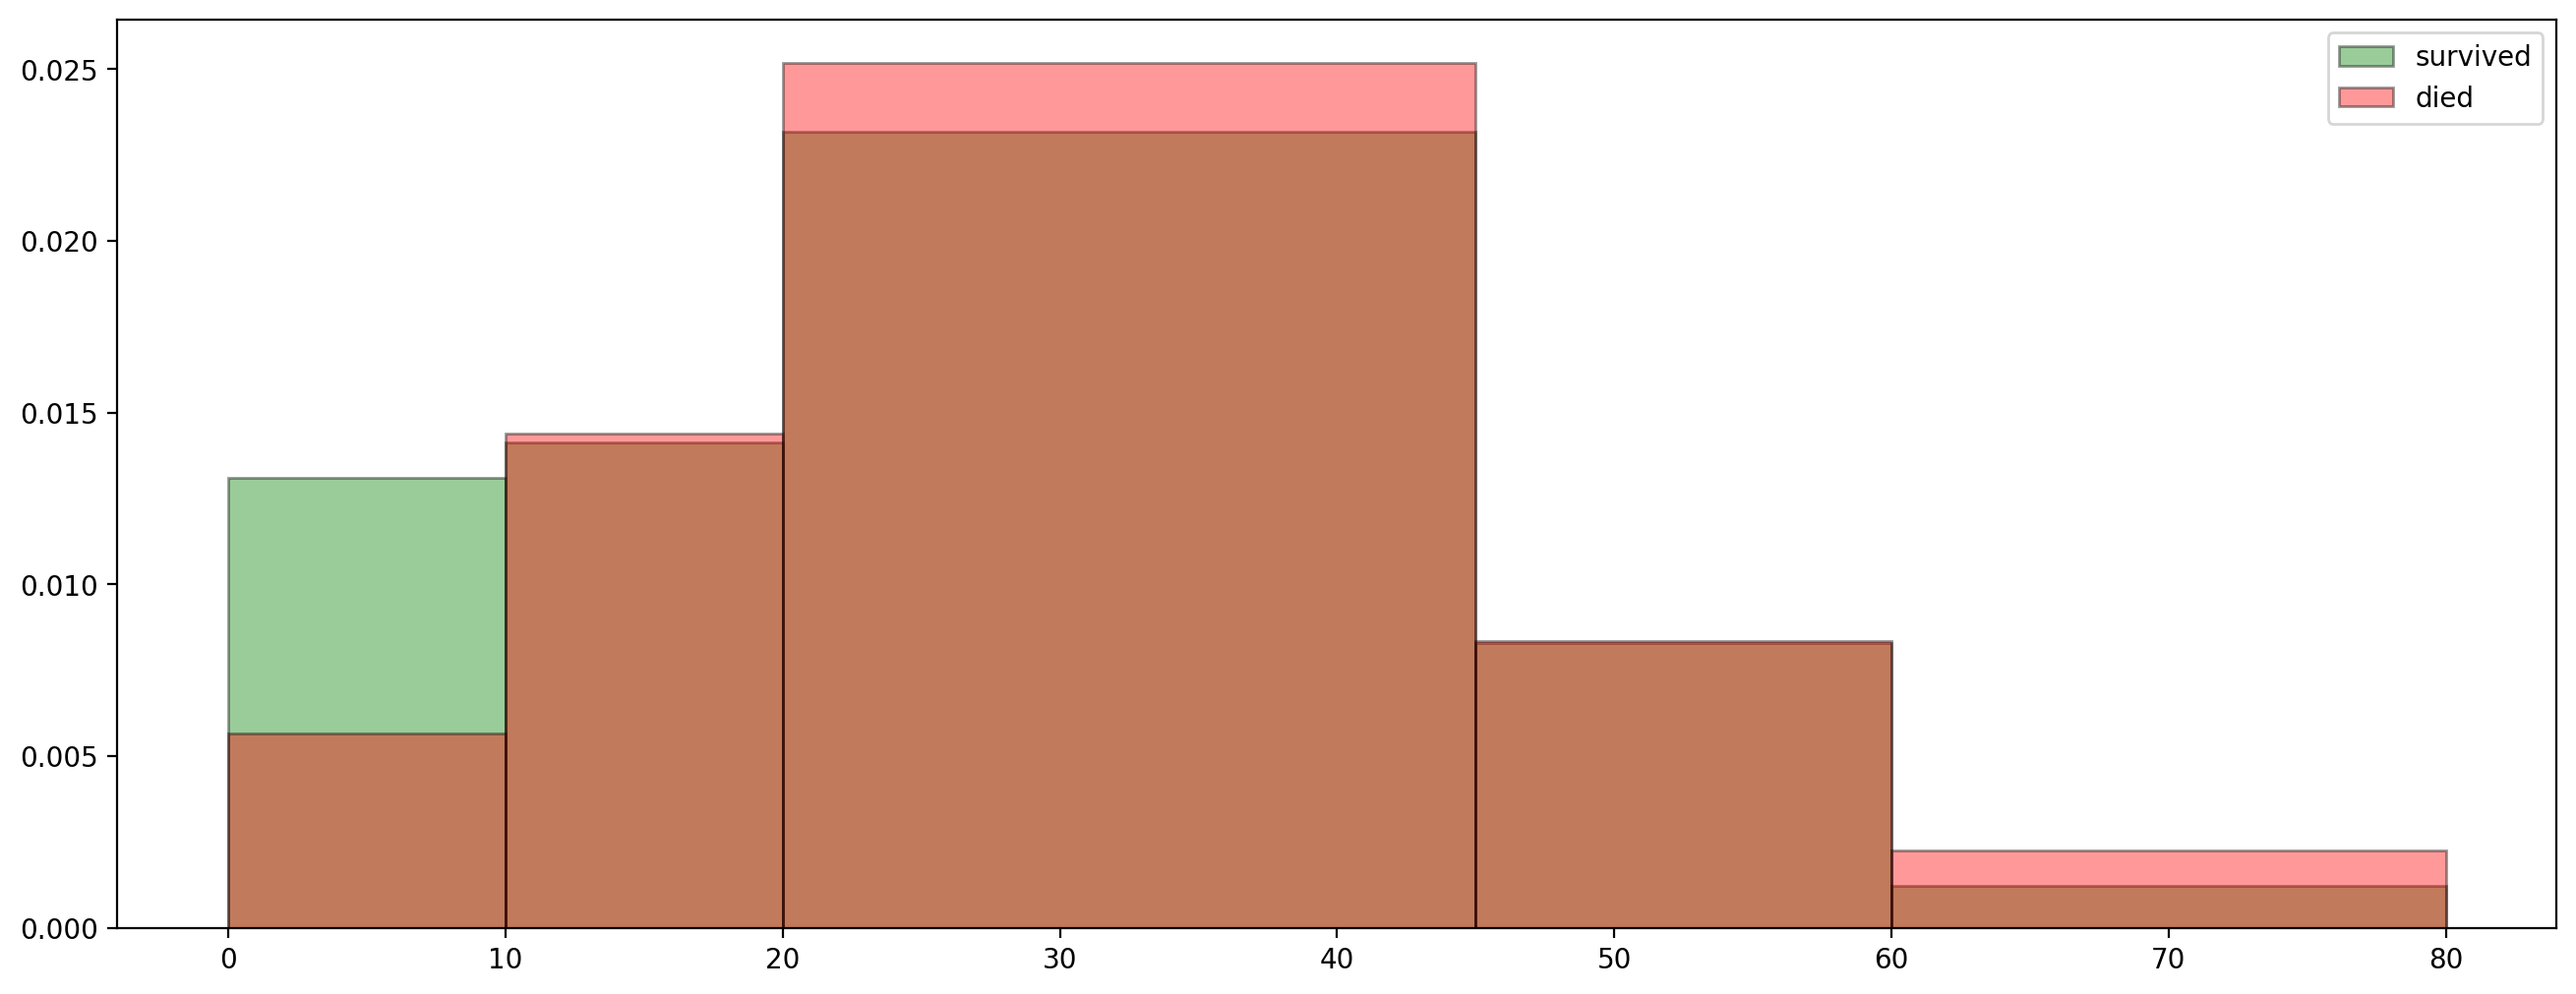

In [5]:
v_min, v_max = min( ages ), max(ages)
bins = np.array([ 0, 10, 20, 45, 60, 80 ])



plt.figure( figsize=(16,6), dpi = 200 )
## Survived
indices = survived == 1
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived', ec = 'black' )
## Died
indices = survived == 0
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died', ec = 'black' )
#
plt.legend()
plt.show()

حال می‌بینیم که:
- اغلب افراد مرده، بین ۱۰ تا ۶۰ سال هستند.
- در افراد نجات یافته، درصد کودک‌ها خیلی بیش‌تر است
- در افراد مرده، درصد افراد سال‌خورده (۶۰ تا ۸۰ سال) خیلی بیش‌تر است.


### دسته‌بندی دلخواه به تفکیک جنسیت
حال دسته‌بندی جدید را به تفکیک جنسیت رسم می‌کنیم:


In [6]:
v_min, v_max = min( ages ), max(ages)
bins = np.array([ 0, 10, 20, 45, 60, 80 ])

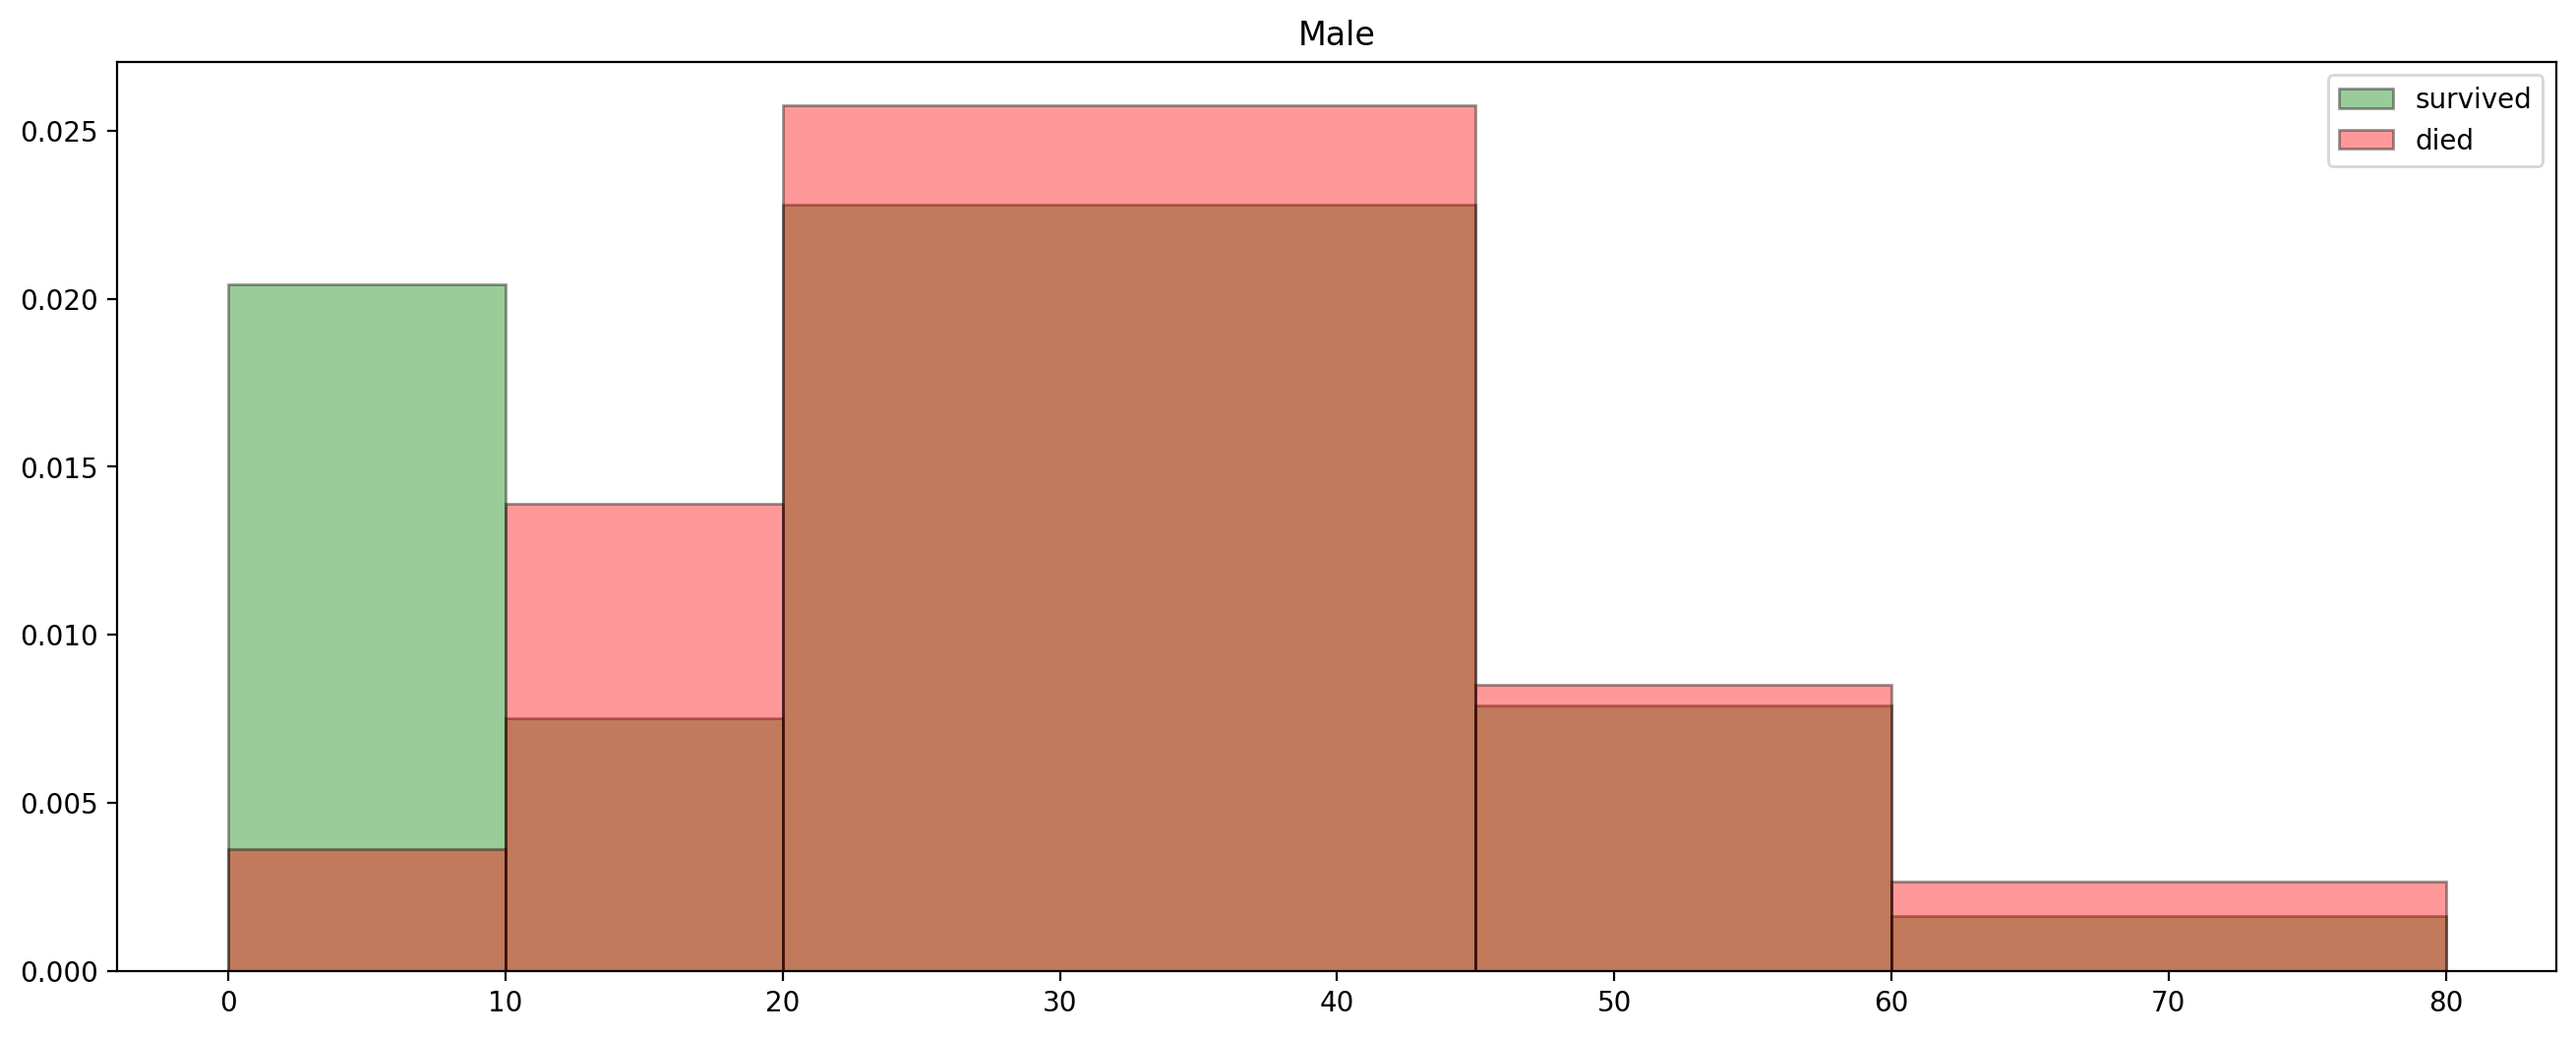

In [7]:
# Man vs. Woman
############## Man
plt.figure( figsize=(16,6), dpi = 200 )
plt.title('Male')
## Survived
indices = (survived == 1) & (sex == 'male')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived', ec = 'black' )
## Died
indices = (survived == 0) & (sex == 'male')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died', ec = 'black' )
#
plt.legend()
plt.show()

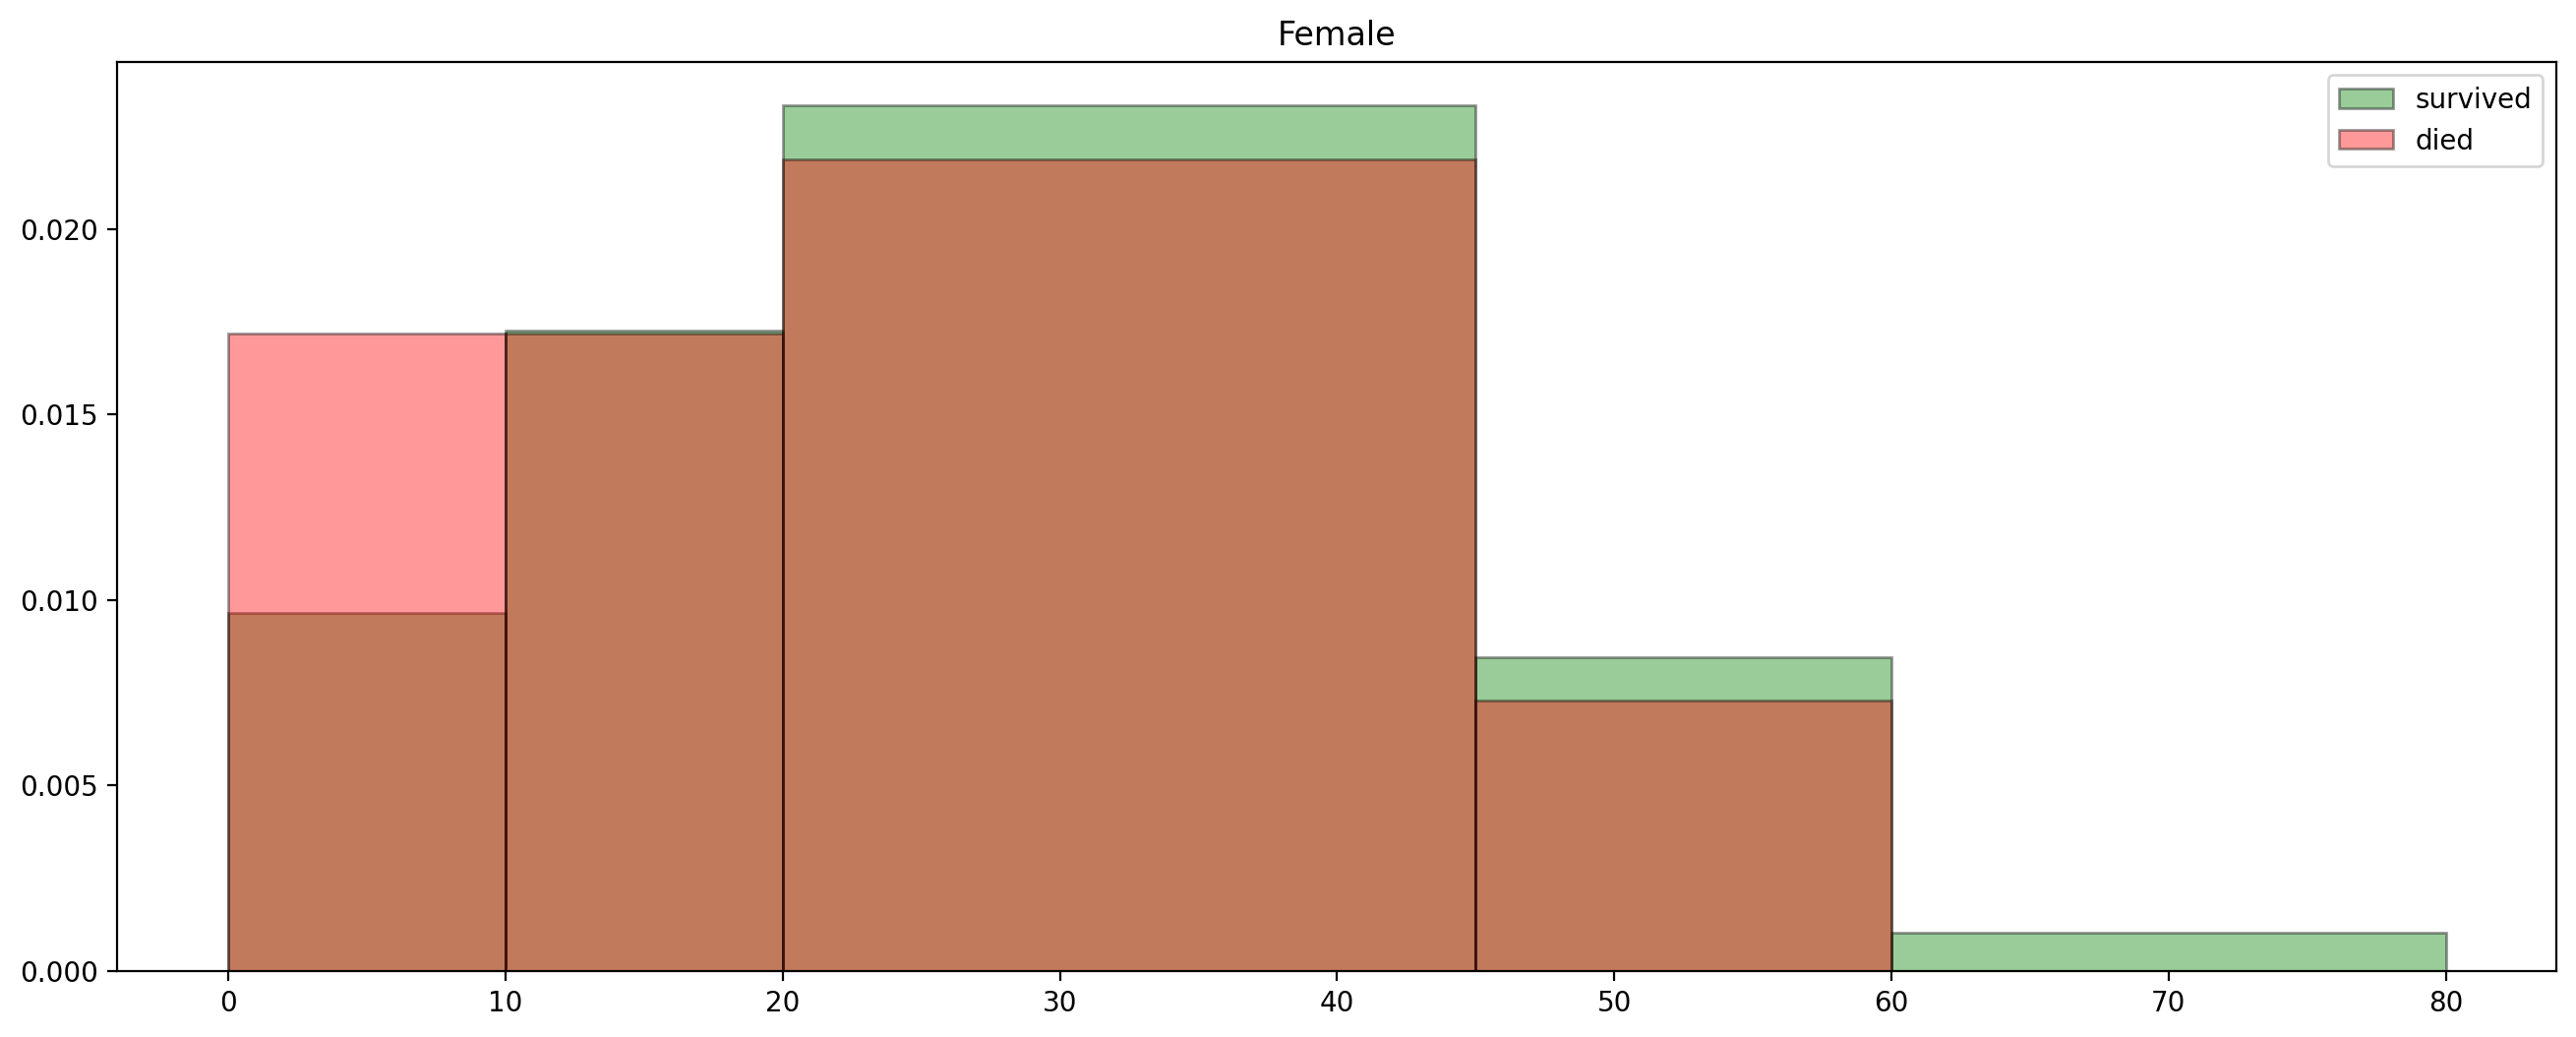

In [8]:
############## Woman
plt.figure( figsize=(16,6), dpi = 200 )
plt.title('Female')
## Survived
indices = (survived == 1) & (sex == 'female')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'green', label = 'survived', ec = 'black' )
## Died
indices = (survived == 0) & (sex == 'female')
plt.hist( ages[indices], bins = bins, alpha = 0.4, density=True, color = 'red', label = 'died', ec = 'black' )
#
plt.legend()
plt.show()

همان‌گونه که می‌بینید:
- در میان مردها، نسبت قابل توجه‌ی از نجات‌یافته‌ها پسر بچه هستند. در حالی که در میان مرده‌ها، این نسبت بسیار کوچک‌تر است.
- در میان بانوان، تمامی افراد بین ۶۰ تا ۸۰ سال نجات پیدا کرده‌اند.
- در میان بانوان، درصد بیش‌تری از مرده‌ها را دختر بچه‌ها تشکیل می‌دهند (نسبت به نجات‌یافته‌ها).


### شانس زنده ماندن در هر کلاس سنی
یک نوع مقایسه‌ی ساده‌تر وجود دارد که تعبیر آن راحت‌تر است. به این شکل که:
>یک فرد که در یک کلاس سنّی قرار داد، چقدر شانس زنده ماندن داشته است (از نظر آماری در داده)

به این منظور باید در هر کلاس سنّی، تعداد کل افراد و افراد نجات‌یافته را حساب کرد و نسبت این دو عدد را گزارش کرد.


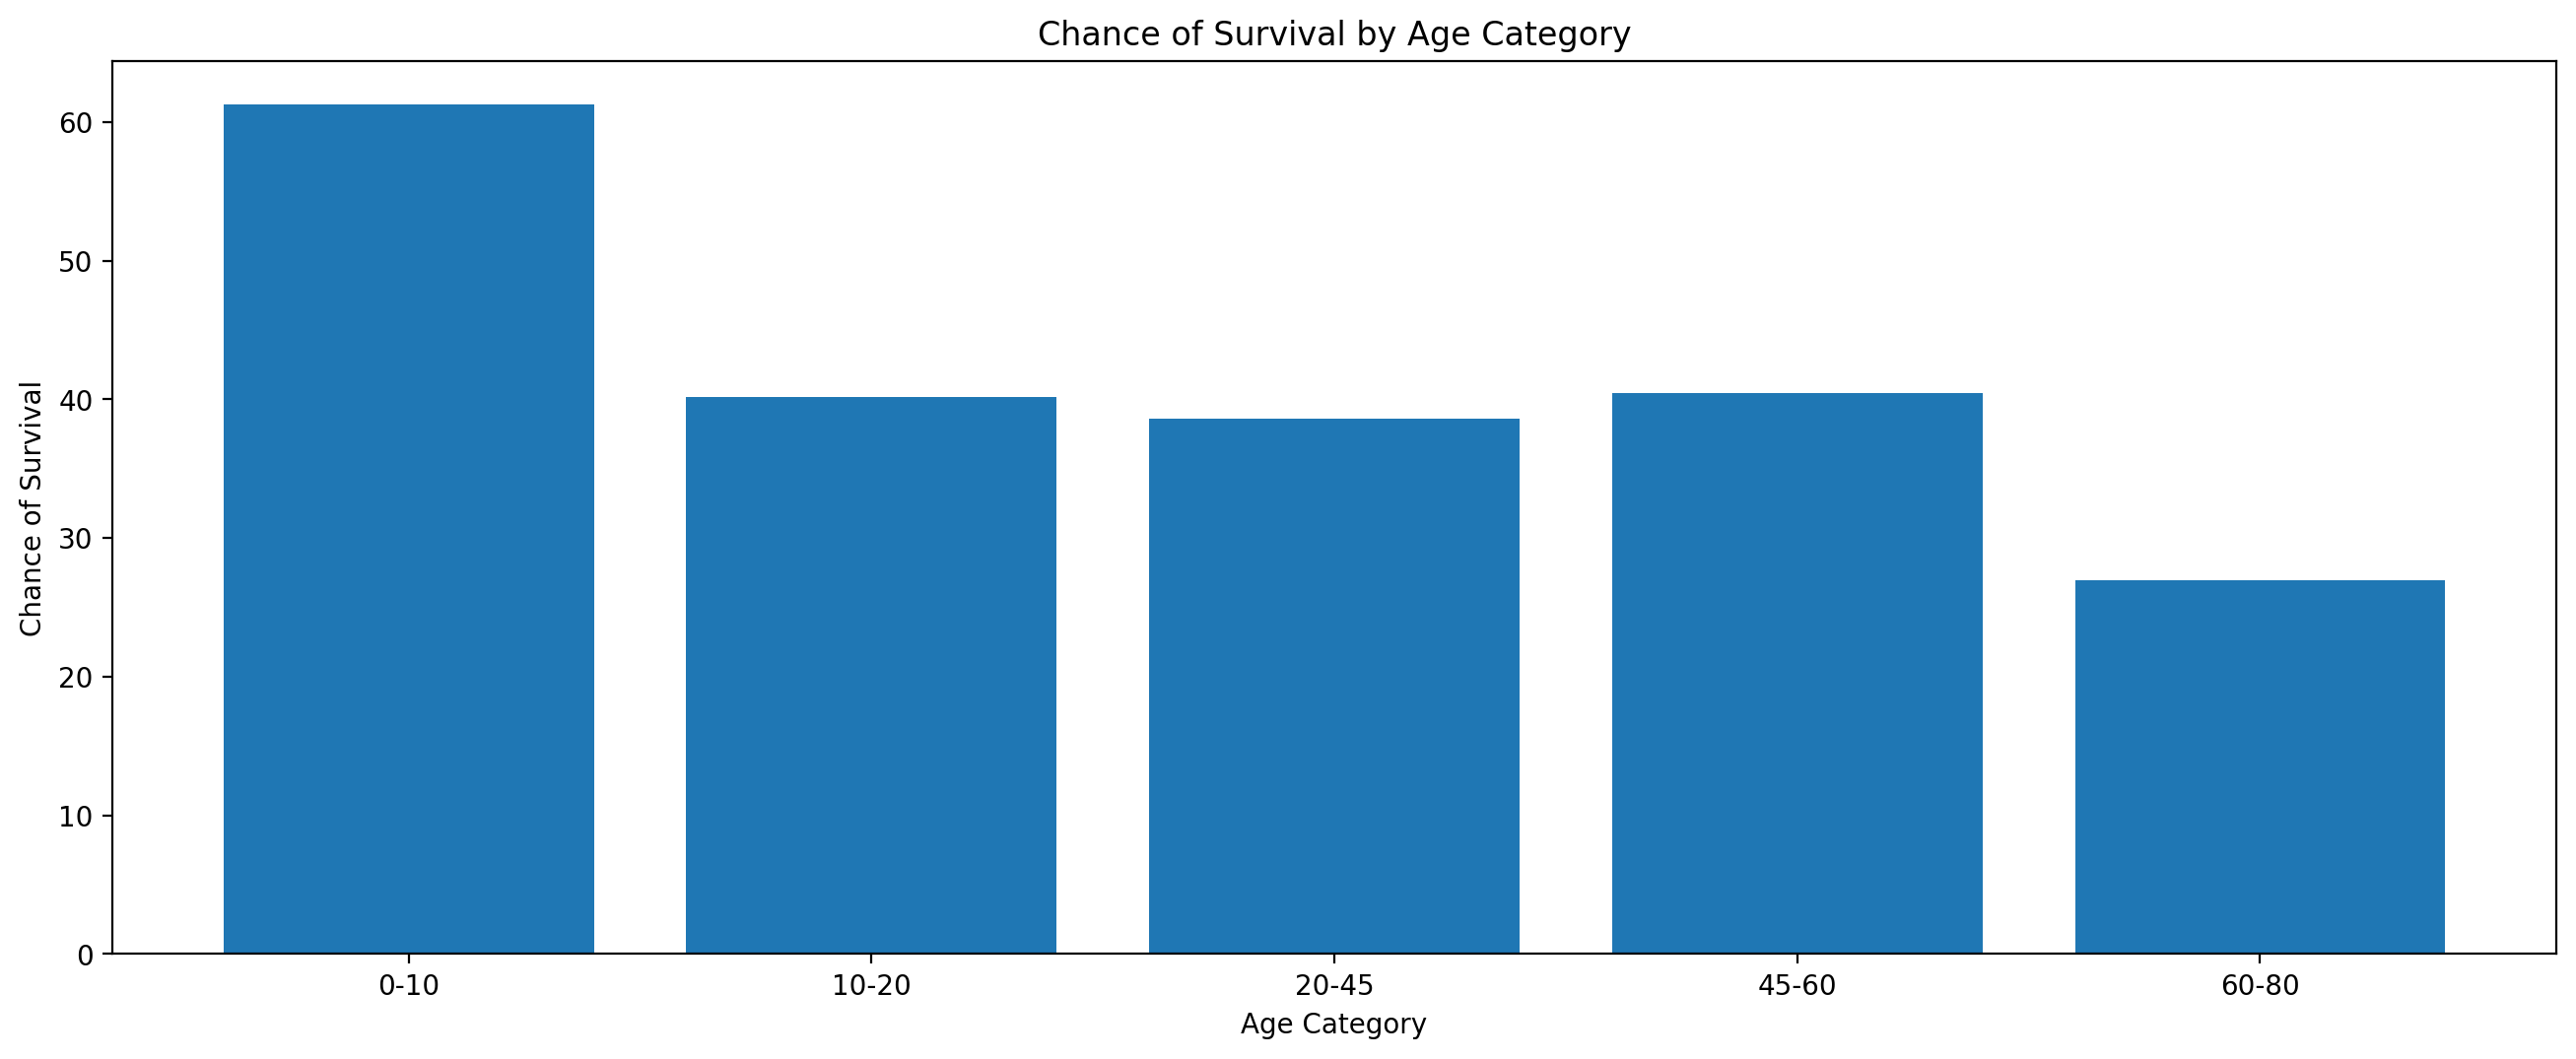

In [9]:
v_min, v_max = min( ages ), max(ages)
bins = np.array([ 0, 10, 20, 45, 60, 80 ])

plt.figure( figsize=(16,6), dpi = 200 )
plt.title('Chance of Survival by Age Category')
## Survived
indices = survived == 1
freqs_survived, _ = np.histogram( ages[indices], bins = bins )
## Died
indices = survived == 0
freqs_died, _ = np.histogram( ages[indices], bins = bins )
# To Plot
xs = [ '{}-{}'.format(bins[i],bins[i+1]) for i in range(len(bins)-1) ]
to_plot = 100 * freqs_survived / ( freqs_survived + freqs_died )
plt.bar( xs, to_plot )
#
plt.xlabel('Age Category')
plt.ylabel('Chance of Survival')
plt.show()

همان گونه که در شکل می‌بینید:
- شانس نجات یافتن کودکان بین ۰ تا ۱۰ سال، ۶۰٪ است.
- افراد ۱۰ تا ۶۰ سال، حدود ۴۰٪ شانس نجات‌یافتن داشته‌اند.
- افراد ۶۰ تا ۸۰ سال حدود ۲۷٪ شانس نجات‌یافتن داشتند.


# تمرین
تابع `survival_chance` را طوری تکمیل کنید که با گرفتن داده‌ی تایتانیک و  یک بازه‌ی سنی (شامل سن ابتدا و انتهای بازه)، شانس زنده ماندن در آن بازه را به ازای جنسیت مرد و زن، به صورت یک دیکشنری گزارش کند. (تنها برای مسافرانی که عدد سن برای آن‌ها وجود دارد). سپس آن را در فایل `functions.py` اضافه کنید.

$$
Age_{start} \leqslant Age \leqslant Age_{end}
$$

- در صورتی که در بازه‌ی داده شده، از یکی از (یا هردوی) جنسیت‌ها نمونه‌ای وجود نداشته‌ باشد، در خروجی برای آن جنسیت مقدار `-1` در نظر بگیرید.
- شانس زنده ماندن را تا ۳ رقم اعشار گرد کنید.
- دیکشنری خروجی به شکل زیر خواهد بود.
```python
{
    "male":chace_for_males,
    "female":chance_for_females
}
```

برای داشتن لیست اطلاعات ستون‌های مورد نظر می‌توانید خطوط کامنت شده در کد زیر را از حالت کامنت خارج کرده و بدون نیاز به دانش استفاده از لایبرری پانداس به حل سوال بپردازید


In [42]:
def survival_chance(titanic_df,start_age,end_age):
    Survived = df.Survived.tolist()
    Ages = df.Age.tolist()
    Sex = df.Sex.tolist()
    survived_age, sex_age = [], []
    for i in range(len(Survived)):
        if start_age <= Ages[i] <= end_age:
            survived_age.append(Survived[i])
            sex_age.append(Sex[i])
    males, females = sex_age.count('male'), sex_age.count('female')
    sur_males, sur_females = 0, 0
    for j in range(len(survived_age)):
        if survived_age[j] == 1 and sex_age[j] == 'male':
            sur_males += 1
        elif survived_age[j] == 1 and sex_age[j] == 'female':
            sur_females += 1
    if males == 0:
        male_chance = -1
    else:
        male_chance = round(sur_males / males, 3)
    if females == 0:
        female_chance = -1
    else:
        female_chance = round(sur_females / females, 3)
    chance = {'male': male_chance, 'female': female_chance}
    return chance

{'male': 0.143, 'female': -1}

برای تست کردن تابع خود می‌توانید خط زیر را اجرا کنید.

In [44]:
assert survival_chance(df,70,80) == {'female': -1, 'male': 0.143}

پس از ذخیره کردن ادیتور جوپیتر و اضافه کردن تابع پاسخ به فایل پایتون و ذخیره‌ی آن
کد زیر را اجرا کنید تا فایل زیپ پاسخ برای شما ساخته شود،
سپس فایل زیپ را در سامانه ارسال کنید.


In [47]:
import zlib
import zipfile


def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["functions.py", "solution.ipynb"]
compress(file_names)


File Paths:
['functions.py', 'solution.ipynb']
